# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)

import warnings
warnings.simplefilter('ignore')



import pandas as pd
import numpy as np

import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import matplotlib.pyplot as plt
import matplotlib

from pylab import plot,show, hist, rcParams 
rcParams['figure.figsize'] = 9, 8

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression 
from sklearn.model_selection import train_test_split, cross_val_score


%config InlineBackend.figure_format = 'png' 
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 16, 12



from plotly.offline import init_notebook_mode, iplot
import plotly 
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [2]:
df_geo = pd.read_excel('geo.xlsx')
df_comm = pd.read_excel('geo_comment.xlsx')

In [3]:
df_geo.shape

(108806, 3)

In [4]:
df_geo.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [5]:
df_comm.shape

(70382, 5)

In [6]:
df_comm.head()

,x,y,comment_class,multiplier,comment
0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


In [7]:
y = df_comm['comment_class']

In [8]:
X = df_comm[['x', 'y']]

In [9]:
#df.plot(kind="scatter", x="x", y="y")

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
X_scaled = scaler.fit_transform(X)

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn', s=60)

In [60]:
#data_xls = pd.read_excel('geo.xlsx', 'Sheet1', index_col=None)
#data_xls.to_csv('csvfile.csv', encoding='utf-8')

In [14]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [16]:
algorithms = [
    AffinityPropagation(),
    KMeans(n_clusters=2),
    AgglomerativeClustering(n_clusters=2),
    DBSCAN(),
]

In [15]:
algorithms = [
    DBSCAN(),
]

In [16]:
clusters_random = np.random.randint(low=0, high=2, size=len(X))

In [17]:
def get_descr(algo_name, y, y_pred, X):
    return "{}\nARI {:.2f}\nSilhouette {:.2f}".format(
        algo_name,
        adjusted_rand_score(y, y_pred),
        silhouette_score(X, y_pred)
    )

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(15, 2))
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_random, cmap='autumn', s=60)
axes[0].set_title(get_descr("Random", y, clusters_random, X_scaled))
for ax, algorithm in zip(axes[1:], algorithms):
    # кластеризуем и выводим картинку
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='autumn', s=60, alpha=0.2)
    ax.set_title(get_descr(algorithm.__class__.__name__, y, clusters, X_scaled))
    
    # если есть центры кластеров - выведем их
    if algorithm.__class__.__name__ in {'KMeans', 'AffinityPropagation'}:
        centers = algorithm.cluster_centers_
        ax.scatter(centers[:, 0], centers[:, 1], s=50)

In [1]:
import geopandas as gpd
%matplotlib inline

https://mygeodata.cloud/converter/csv-to-shp

In [20]:
mo_gdf = gpd.read_file('mygeodata/csvfile-point.shp')
mo_gdf.head()

,x,y,comment_cl,geometry
0,37.612416,55.777454,-1,POINT (37.612416 55.777454)
1,37.612416,55.777454,-1,POINT (37.612416 55.777454)
2,37.603298,55.742108,-1,POINT (37.603298 55.742108)
3,37.558526,55.728758,-1,POINT (37.558526 55.728758)
4,37.566431,55.731794,-1,POINT (37.566431 55.731794)


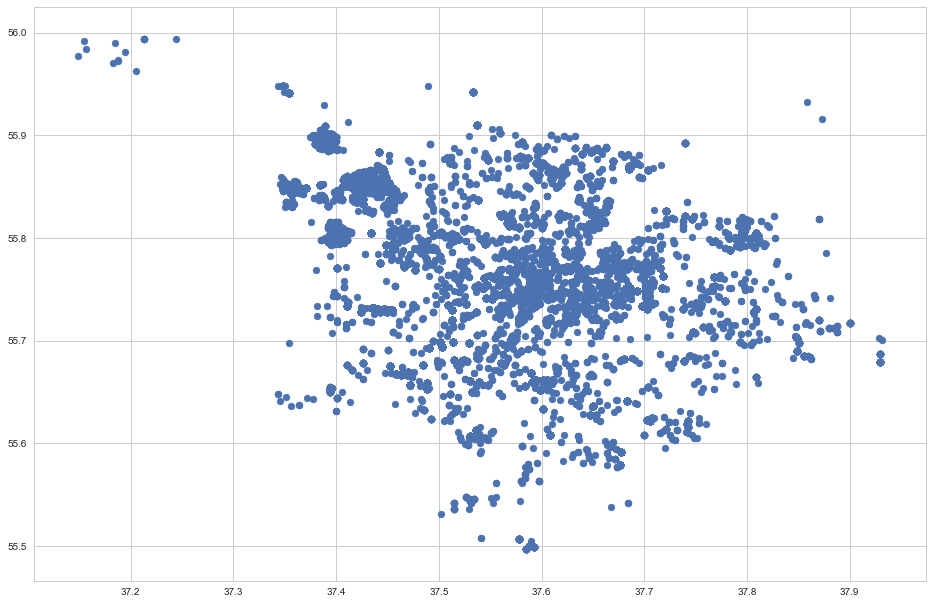

In [21]:
mo_gdf.plot()

In [22]:
mo_gdf_wm = mo_gdf.to_crs({'init' :'epsg:3857'})